In [153]:
import numpy as np

import Ramsey_ExperimentV3
import estimator

In [154]:
from importlib import reload

reload(estimator)

<module 'estimator' from 'C:\\Users\\david\\PycharmProjects\\Crosstalk\\estimator.py'>

In [155]:
from tqdm import tqdm
import random

T = np.pi
uni_delay = np.linspace(0, T, 20)
# shots = np.arange(500, 20000, 2000)
shots = 5000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
uniform_local_X = []
N = [1, 2, 3, 4, 5]
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]  #todo change for a better average

repetitions = 500

for rep in tqdm(range(repetitions)):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []
    rep_error_uniform_G = []
    rep_error_uniform_X = []

    W = [random.gauss(1, 0.2) for _ in range(N[-1])]
    Decay = [random.gauss(1, 0.2) for _ in range(N[-1])]
    J = {}
    J_list = [random.gauss(0.5, 0.1) for _ in range(N[-1] - 1)]
    for i in range(N[-1] - 1):  # Only connect to the next neighbor
        J[(i, i + 1)] = J_list[i]

    for n in N:
        J_subset = {key: J[key] for key in list(J.keys())[:(n - 1)]}

        # batch_x, batch_y = Ramsey_ExperimentV2.ramsey_global(n, s, delay, Decay, W, J)
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.simulate_circuit(n, shots, delay,
                                                                                                      Decay[:n],
                                                                                                      W[:n], J_subset,
                                                                                                      "XY")
        # batch_x_det_uni, batch_cross_uni = Ramsey_ExperimentV3.ramsey_local_X(n, s, uni_delay, Decay, W, J)
        batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni = Ramsey_ExperimentV3.simulate_circuit(n,
                                                                                                                      shots,
                                                                                                                      uni_delay,
                                                                                                                      Decay[
                                                                                                                      :n],
                                                                                                                      W[
                                                                                                                      :n],
                                                                                                                      J_subset,
                                                                                                                      "XY")
        batch_det, batch_cross = Ramsey_ExperimentV3.simulate_circuit(n, shots, fisher_delay, Decay[:n],
                                                                      W[:n], J_subset, "X")

        batch_det_uni_x, batch_cross_uni_x = Ramsey_ExperimentV3.simulate_circuit(n, shots, uni_delay, Decay[:n],
                                                                                  W[:n], J_subset, "X")

        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)

        # Decay_uni, W_uni, J_uni = estimator.one_by_one_X(batch_x_det_uni, batch_cross_uni)
        Decay_uni, W_uni, J_uni = estimator.one_by_one_fit(batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni,
                                                           batch_y_cross_uni)
        # Decay_uni_G, W_uni_G, J_uni_G = estimator.one_by_one_fit(batch_x_det_uni_G, batch_y_det_uni_G, batch_x_cross_uni_G, batch_y_cross_uni_G)
        Decay_uni_X, W_uni_X, J_uni_X = estimator.one_by_one_X(batch_det_uni_x, batch_cross_uni_x)

        rep_error_fisher.append(estimator.percent_error(([Decay[:n], W[:n], J_list[:(n - 1)]]),
                                                        ([Decay_fisher, W_fisher, J_fisher])))
        rep_error_local.append(estimator.percent_error(([Decay[:n], W[:n], J_list[:(n - 1)]]),
                                                       ([Decay_local, W_local, J_local])))
        rep_error_uniform.append(estimator.percent_error(([Decay[:n], W[:n], J_list[:(n - 1)]]),
                                                         ([Decay_uni, W_uni, J_uni])))

        rep_error_uniform_X.append(estimator.percent_error(
            ([Decay[:n], W[:n], J_list[:(n - 1)]]),
            ([Decay_uni_X, W_uni_X, J_uni_X])
        ))
    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    uniform_local.append(rep_error_uniform)
    uniform_local_X.append(rep_error_uniform_X)
    # uniform_local_G.append(rep_error_uniform_G)

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\david\PycharmProjects\Crosstalk\estimator.py:66: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
C:\Users\david\PycharmProjects\Crosstalk\estimator.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
C:\Users\david\PycharmProjects\Crosstalk\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\david\PycharmProjects\Crosstalk\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 500/500 [07:02<00:00,  1.18it/s]


In [156]:

errors_fisher_reshaped = np.array(errors_fisher).transpose()
errors_local_reshaped = np.array(errors_local).transpose()
errors_uniform_reshaped = np.array(uniform_local).transpose()
errors_uniform_reshaped_X = np.array(uniform_local_X).transpose()

errors_fisher_reshaped_a = errors_fisher_reshaped[0]
errors_local_reshaped_a = errors_local_reshaped[0]
errors_uniform_reshaped_a = errors_uniform_reshaped[0]
errors_uniform_reshaped_X_a = errors_uniform_reshaped_X[0]

errors_fisher_reshaped_w = errors_fisher_reshaped[1]
errors_local_reshaped_w = errors_local_reshaped[1]
errors_uniform_reshaped_w = errors_uniform_reshaped[1]
errors_uniform_reshaped_X_w = errors_uniform_reshaped_X[1]

errors_fisher_reshaped_j = errors_fisher_reshaped[2]
errors_local_reshaped_j = errors_local_reshaped[2]
errors_uniform_reshaped_j = errors_uniform_reshaped[2]
errors_uniform_reshaped_X_j = errors_uniform_reshaped_X[2]

errors_fisher_mean_a, errors_fisher_std_a = estimator.mean_and_std(errors_fisher_reshaped_a)
errors_local_mean_a, errors_local_std_a = estimator.mean_and_std(errors_local_reshaped_a)
errors_uniform_mean_a, errors_uniform_std_a = estimator.mean_and_std(errors_uniform_reshaped_a)
errors_uniform_mean_X_a, errors_uniform_std_X_a = estimator.mean_and_std(errors_uniform_reshaped_X_a)

errors_fisher_mean_w, errors_fisher_std_w = estimator.mean_and_std(errors_fisher_reshaped_w)
errors_local_mean_w, errors_local_std_w = estimator.mean_and_std(errors_local_reshaped_w)
errors_uniform_mean_w, errors_uniform_std_w = estimator.mean_and_std(errors_uniform_reshaped_w)
errors_uniform_mean_X_w, errors_uniform_std_X_w = estimator.mean_and_std(errors_uniform_reshaped_X_w)

errors_fisher_mean_j, errors_fisher_std_j = estimator.mean_and_std(errors_fisher_reshaped_j)
errors_local_mean_j, errors_local_std_j = estimator.mean_and_std(errors_local_reshaped_j)
errors_uniform_mean_j, errors_uniform_std_j = estimator.mean_and_std(errors_uniform_reshaped_j)
errors_uniform_mean_X_j, errors_uniform_std_X_j = estimator.mean_and_std(errors_uniform_reshaped_X_j)

print(errors_fisher_mean_a[0])

0.06883820038662095


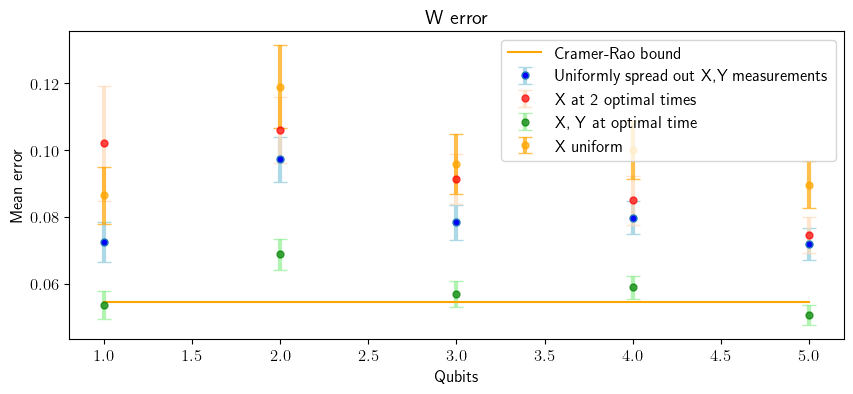

In [157]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}  # Adjust the figure size to make the plot longer
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = 12  # Example size for font

plt.errorbar(N, np.array(errors_uniform_mean_w), yerr= np.array(errors_uniform_std_w), fmt='o',
             capsize=5, ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5,
             label='Uniformly spread out X,Y measurements')

plt.errorbar(N, np.array(errors_fisher_mean_w), yerr= np.array(errors_fisher_std_w), fmt='o',
             capsize=5, ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X at 2 optimal times',
             alpha=0.7)

plt.errorbar(N, np.array(errors_local_mean_w), yerr=np.array(errors_local_std_w), fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y at optimal time', alpha=0.7)

plt.errorbar(N, np.array(errors_uniform_mean_X_w), yerr= np.array(errors_uniform_std_X_w), fmt='o',
             capsize=5, ecolor='orange', elinewidth=3, color='orange', markersize=5, label='X uniform',
             alpha=0.7)
plt.plot(N, [np.e / np.sqrt(shots / 2)]*5, '-', label='Cramer-Rao bound', color='orange')

plt.xlabel('Qubits')
plt.ylabel('Mean error ')
plt.title("W error")
plt.legend()

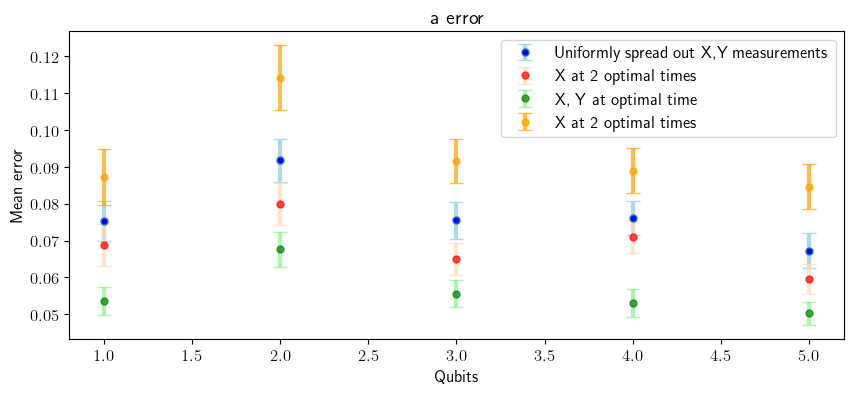

In [158]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}  # Adjust the figure size to make the plot longer
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = 12  # Example size for font

plt.errorbar(N, np.array(errors_uniform_mean_a), yerr= np.array(errors_uniform_std_a), fmt='o',
             capsize=5, ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5,
             label='Uniformly spread out X,Y measurements')

plt.errorbar(N, np.array(errors_fisher_mean_a), yerr= np.array(errors_fisher_std_a), fmt='o',
             capsize=5, ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X at 2 optimal times',
             alpha=0.7)

plt.errorbar(N, np.array(errors_local_mean_a), yerr= np.array(errors_local_std_a), fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y at optimal time', alpha=0.7)

plt.errorbar(N, np.array(errors_uniform_mean_X_a), yerr= np.array(errors_uniform_std_X_a), fmt='o',
             capsize=5, ecolor='orange', elinewidth=3, color='orange', markersize=5, label='X at 2 optimal times',
             alpha=0.7)
plt.xlabel('Qubits')
plt.ylabel('Mean error')
plt.title("a error")
plt.legend()

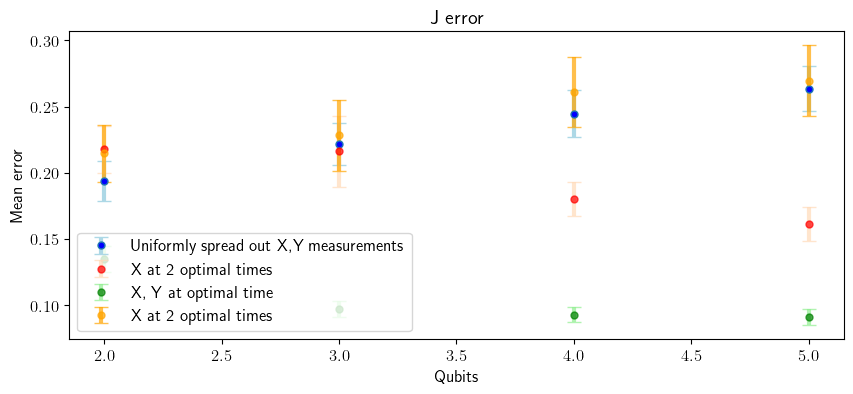

In [159]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}  # Adjust the figure size to make the plot longer
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = 12  # Example size for font

plt.errorbar(N, np.array(errors_uniform_mean_j), yerr= np.array(errors_uniform_std_j), fmt='o',
             capsize=5, ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5,
             label='Uniformly spread out X,Y measurements')

plt.errorbar(N, np.array(errors_fisher_mean_j), yerr= np.array(errors_fisher_std_j), fmt='o',
             capsize=5, ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X at 2 optimal times',
             alpha=0.7)

plt.errorbar(N, np.array(errors_local_mean_j), yerr= np.array(errors_local_std_j), fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y at optimal time', alpha=0.7)

plt.errorbar(N, np.array(errors_uniform_mean_X_j), yerr=np.array(errors_uniform_std_X_j), fmt='o',
             capsize=5, ecolor='orange', elinewidth=3, color='orange', markersize=5, label='X at 2 optimal times',
             alpha=0.7)
plt.xlabel('Qubits')
plt.ylabel('Mean error')
plt.title("J error")
plt.legend()

In [160]:
import os
import pandas as pd

user_home = os.path.expanduser("~")

results_df = pd.DataFrame({
    "Qubits": N,
    "shots": shots,
    "errors_fisher_mean_w": errors_fisher_mean_w,
    "errors_fisher_std_w": errors_fisher_std_w,
    "errors_local_mean_w": errors_local_mean_w,
    "errors_local_std_w": errors_local_std_w,
    "errors_uniform_mean_w": errors_uniform_mean_w,
    "errors_uniform_std_w": errors_uniform_std_w,
    "errors_uniform_mean_X_w": errors_uniform_mean_X_w,
    "errors_uniform_std_X_w": errors_uniform_std_X_w,
})

# Saving to Excel
results_df.to_excel(
    user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\errors_vs_qubits_w.xlsx',
    index=False)

results_df = pd.DataFrame({
    "Qubits": N,
    "shots": shots,
    "errors_fisher_mean_a": errors_fisher_mean_a,
    "errors_fisher_std_a": errors_fisher_std_a,
    "errors_local_mean_a": errors_local_mean_a,
    "errors_local_std_a": errors_local_std_a,
    "errors_uniform_mean_a": errors_uniform_mean_a,
    "errors_uniform_std_a": errors_uniform_std_a,
    "errors_uniform_mean_X_a": errors_uniform_mean_X_a,
    "errors_uniform_std_X_a": errors_uniform_std_X_a,
})

# Saving to Excel
results_df.to_excel(
    user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\errors_vs_qubits_a.xlsx',
    index=False)

results_df = pd.DataFrame({
    "Qubits": N,
    "shots": shots,
    "errors_fisher_mean_a": errors_fisher_mean_j,
    "errors_fisher_std_a": errors_fisher_std_j,
    "errors_local_mean_a": errors_local_mean_j,
    "errors_local_std_a": errors_local_std_j,
    "errors_uniform_mean_a": errors_uniform_mean_j,
    "errors_uniform_std_a": errors_uniform_std_j,
    "errors_uniform_mean_X_a": errors_uniform_mean_X_j,
    "errors_uniform_std_X_a": errors_uniform_std_X_j,
})

# Saving to Excel
results_df.to_excel(
    user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\errors_vs_qubits_j.xlsx',
    index=False)